# **PRVI DEO PROJEKTNOG ZADATKA**

## OBRADA BAZE


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [ ]:
#ucitavanje baze
df = pd.read_csv('Metabolic Syndrome.csv')

# format podataka
print("shape: \n", df.shape)
print("\n types:\n", df.dtypes, "\n")
df.head()

shape: 
 (2401, 15)

 types:
 seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome      int64
dtype: object 



,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#provera binarnih vrednosti
procenat_vrednosti = df['MetabolicSyndrome'].value_counts(normalize=True) * 100
print(procenat_vrednosti)

0    65.764265
1    34.235735
Name: MetabolicSyndrome, dtype: float64


Provera koliko različitih kategorija imaju kategorička obeležja




In [ ]:
print('\n Albuminuria', df['Albuminuria'].unique())
print('\n Sex', df['Sex'].unique())
print('\n Age', df['Age'].unique())
print('\n Marital', df['Marital'].unique())
print('\n Race', df['Race'].unique())

print('\n WaistCirc', df['WaistCirc'].unique())
print('\n Income', df['Income'].unique())
print('\n BMI', df['BMI'].unique())
print('\n UrAlbCr', df['UrAlbCr'].unique())
print('\n UricAcid', df['UricAcid'].unique())
print('\n BloodGlucose', df['BloodGlucose'].unique())
print('\n HDL', df['HDL'].unique())
print('\n Triglycerides', df['Triglycerides'].unique())

NameError: name 'df' is not defined

Provera postojećih vrednosti, da li postoje autlajeri

In [ ]:
min_waist_circumference = df['WaistCirc'].min()
max_waist_circumference = df['WaistCirc'].max()
print(f"Najmanji obim struka: {min_waist_circumference}")
print(f"Najveći obim struka: {max_waist_circumference}")

osoba_sa_176 = df[df['WaistCirc'] == 176]

# Prikazivanje informacija o osobi sa obimom struka 176, jer je vrednost sumnjiva
print(osoba_sa_176)

Najmanji obim struka: 56.2
Najveći obim struka: 176.0
       seqn  Age   Sex Marital  Income   Race  WaistCirc   BMI  Albuminuria  \
1819  69550   58  Male     NaN  2500.0  Black      176.0  55.7            0   

      UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides  MetabolicSyndrome  
1819     2.27       6.6           106   85             64                  1  


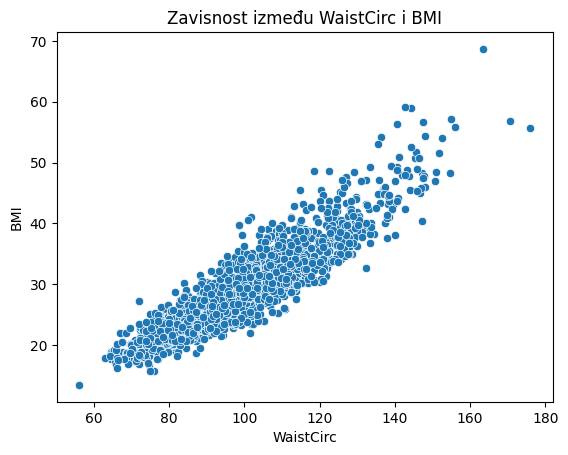

In [ ]:
#posmatranje korelisanosti izmedju dva obelezja

sns.scatterplot(x='WaistCirc', y='BMI', data=df)

plt.title('Zavisnost između WaistCirc i BMI')
plt.xlabel('WaistCirc')
plt.ylabel('BMI')
plt.show()

izbacivanje obeležja seqn jer ne nosi nikakvu informaciju i za svakog je različit


In [ ]:
df.drop(['seqn'], inplace= True, axis = 1)

In [ ]:
#ponovno prikazivanje baze nakon izbacivanja seqn
print("shape: \n", df.shape)
print("\n types:\n", df.dtypes, "\n")
df.head()

shape: 
 (2401, 14)

 types:
 Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome      int64
dtype: object 



,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


prikazivanje NaN vrednosti

In [ ]:
NANs = df.isnull().sum()
print(NANs)
udeo = df.isnull().sum()/len(df)*100
print("\n Procenat NaN: \n", udeo)

Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

 Procenat NaN: 
 Age                  0.000000
Sex                  0.000000
Marital              8.663057
Income               4.872970
Race                 0.000000
WaistCirc            3.540192
BMI                  1.082882
Albuminuria          0.000000
UrAlbCr              0.000000
UricAcid             0.000000
BloodGlucose         0.000000
HDL                  0.000000
Triglycerides        0.000000
MetabolicSyndrome    0.000000
dtype: float64


In [ ]:
print(df.describe())

               Age       Income    WaistCirc          BMI  Albuminuria  \
count  2401.000000  2284.000000  2316.000000  2375.000000  2401.000000   
mean     48.691795  4005.253940    98.307254    28.702189     0.154102   
std      17.632852  2954.032186    16.252634     6.662242     0.422780   
min      20.000000   300.000000    56.200000    13.400000     0.000000   
25%      34.000000  1600.000000    86.675000    24.000000     0.000000   
50%      48.000000  2500.000000    97.000000    27.700000     0.000000   
75%      63.000000  6200.000000   107.625000    32.100000     0.000000   
max      80.000000  9000.000000   176.000000    68.700000     2.000000   

           UrAlbCr     UricAcid  BloodGlucose          HDL  Triglycerides  \
count  2401.000000  2401.000000   2401.000000  2401.000000    2401.000000   
mean     43.626131     5.489046    108.247813    53.369429     128.125364   
std     258.272829     1.439358     34.820657    15.185537      95.322477   
min       1.400000     1.

### traženje autlajera

In [ ]:
print(df.columns)


Index(['Age', 'Sex', 'Marital', 'Income', 'Race', 'WaistCirc', 'BMI',
       'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
       'Triglycerides', 'MetabolicSyndrome'],
      dtype='object')


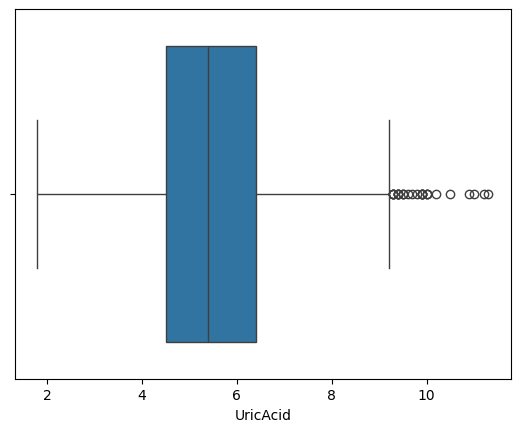

In [ ]:

sns.boxplot(x=df['UricAcid'])
plt.show()

In [ ]:
visoke_vrednosti_uralbcr = df[df['UrAlbCr'] > 1000]

# Filtriranje redova sa metaboličkim sindromom (assumed_column je kolona u kojoj se nalazi informacija o metaboličkom sindromu)
metabolic_syndrome = visoke_vrednosti_uralbcr[visoke_vrednosti_uralbcr['MetabolicSyndrome'] == 0]

# Ispisivanje rezultata
#svi ispitanici koji imaju uralbcr preko 1000 imaju i metabolicki sindorm, vrednosti nisu nevalidne
print(metabolic_syndrome)

      Age   Sex    Marital  Income         Race  WaistCirc   BMI  Albuminuria  \
50     80  Male    Married  2500.0        White       88.6  21.7            2   
246    50  Male  Separated  2000.0        Black       75.5  19.6            2   
418    69  Male    Married  2500.0        Asian       93.2  27.2            2   
910    58  Male    Married  2000.0  MexAmerican      100.6  25.6            2   
2070   77  Male    Married  2500.0        Black       92.0  23.3            2   

      UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides  MetabolicSyndrome  
50    3267.57       4.7           135   44             75                  0  
246   2750.00       5.7           127   80             92                  0  
418   1817.31       6.7            99   64             93                  0  
910   3666.67       8.8           211   48            188                  0  
2070  4462.81       7.4           110   79             91                  0  


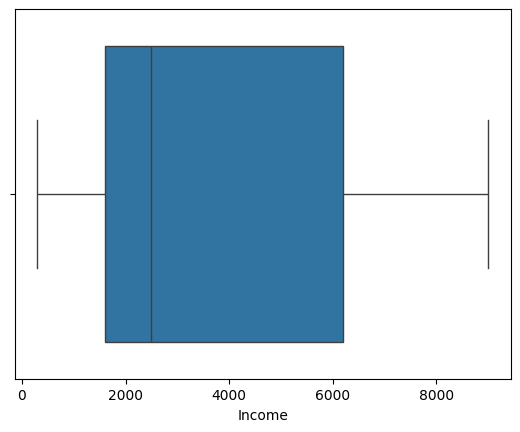

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Income'])
plt.show()

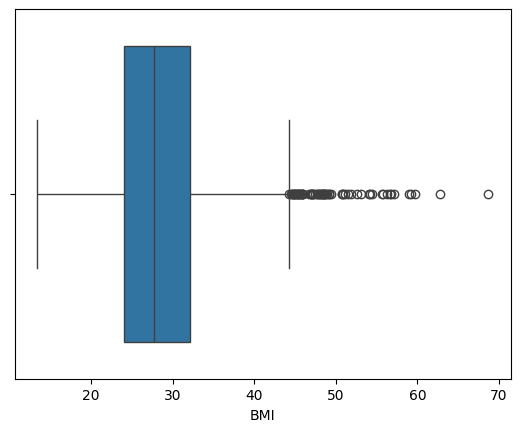

In [ ]:
sns.boxplot(x=df['BMI'])
plt.show()

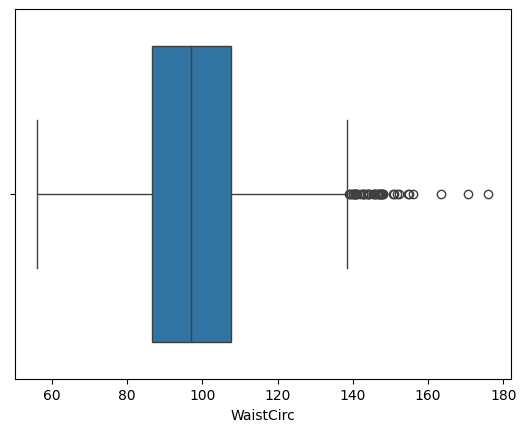

In [ ]:
sns.boxplot(x=df['WaistCirc'])
plt.show()

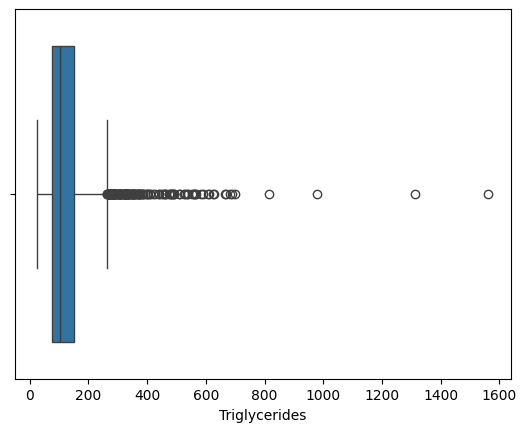

In [ ]:
sns.boxplot(x=df['Triglycerides'])
plt.show()

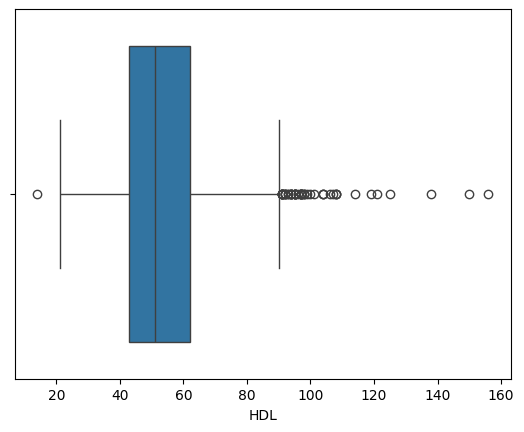

In [ ]:
sns.boxplot(x=df['HDL'])
plt.show()

In [ ]:
correlations = df[['BMI', 'WaistCirc']].corr()
print(correlations)
#korelacija je skoro 1, sto znaci da je jaka linearna povezanost

                BMI  WaistCirc
BMI        1.000000   0.908751
WaistCirc  0.908751   1.000000


### popunjavanje nedostajućih vrednosti

Istraživanje obeležja sa nedostajućim vrednostima

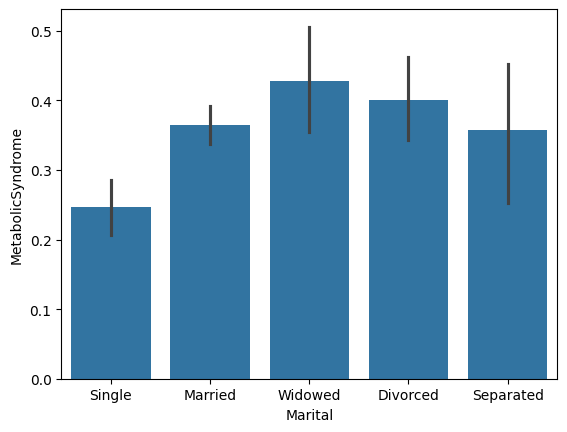

In [ ]:
sns.barplot(x='Marital', y='MetabolicSyndrome', data=df)
plt.show()

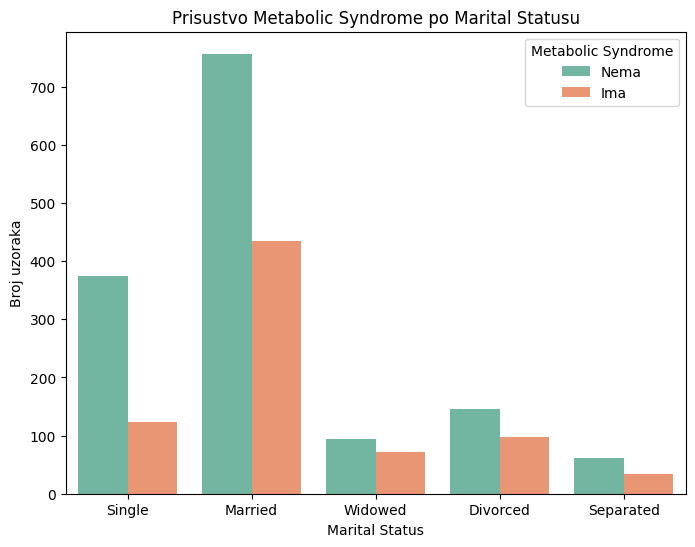

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital', hue='MetabolicSyndrome', data=df, palette='Set2', dodge=True)

plt.title('Prisustvo Metabolic Syndrome po Marital Statusu')
plt.xlabel('Marital Status')
plt.ylabel('Broj uzoraka')
plt.legend(title='Metabolic Syndrome', loc='upper right', labels=['Nema', 'Ima'])

plt.show()

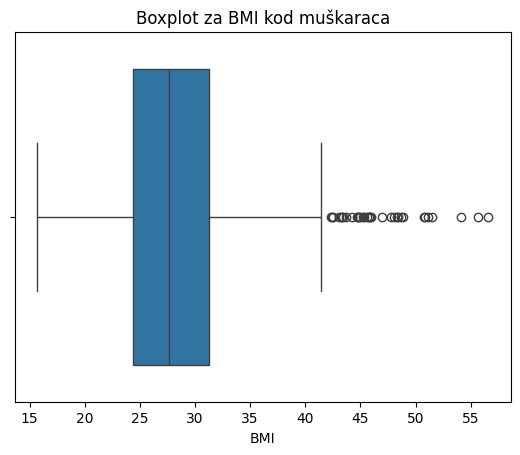

In [ ]:
# Filtriramo podatke samo za muškarce
male_data = df[df['Sex'] == 'Male']

# Iscrtavanje boxplot-a
sns.boxplot(x='BMI', data=male_data)
plt.title('Boxplot za BMI kod muškaraca')
plt.show()

popunjavanje

**INCOME**

In [ ]:


median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)


**WAISTCIRC**

In [ ]:
# Filtriramo podatke samo za žene
female_data = df[df['Sex'] == 'Female']

# Izračunavamo medijanu za WaistCirc kod žena
median_waist_circ_female = female_data['WaistCirc'].median()

# Popunjavamo NaN vrednosti u WaistCirc sa medijanom za žene
df.loc[df['Sex'] == 'Female', 'WaistCirc'] = df.loc[df['Sex'] == 'Female', 'WaistCirc'].fillna(median_waist_circ_female)

In [ ]:
# Filtriramo podatke samo za muškarce
male_data = df[df['Sex'] == 'Male']

# Izračunavamo medijanu za WaistCirc kod muškaraca
median_waist_circ_male = male_data['WaistCirc'].median()

# Popunjavamo NaN vrednosti u WaistCirc sa medijanom za muškarce
df.loc[df['Sex'] == 'Male', 'WaistCirc'] = df.loc[df['Sex'] == 'Male', 'WaistCirc'].fillna(median_waist_circ_male)

**BMI**

In [ ]:
male_data = df[df['Sex'] == 'Male']

# Izračunavamo medijanu za BMI kod muškaraca
median_bmi_male = male_data['BMI'].median()

# Popunjavamo NaN vrednosti u BMI sa medijanom za muškarce
df.loc[df['Sex'] == 'Male', 'BMI'] = df.loc[df['Sex'] == 'Male', 'BMI'].fillna(median_bmi_male)

In [ ]:
female_data = df[df['Sex'] == 'Female']

# Izračunavamo medijanu za BMI kod žena
median_bmi_female = female_data['BMI'].median()

# Popunjavamo NaN vrednosti u BMI sa medijanom za žene
df.loc[df['Sex'] == 'Female', 'BMI'] = df.loc[df['Sex'] == 'Female', 'BMI'].fillna(median_bmi_female)

**MARITAL**

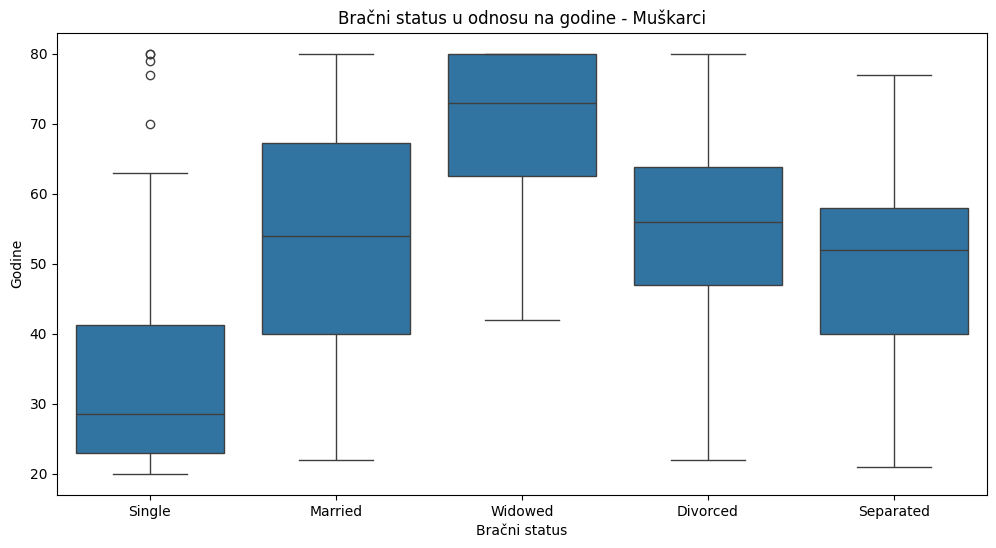

In [ ]:
#posmatramo bračni status muškaraca u različitim starosnim grupama
plt.figure(figsize=(12, 6))

# Kreiramo grafikon
sns.boxplot(x='Marital', y='Age', data=male_data)


plt.xlabel('Bračni status')
plt.ylabel('Godine')
plt.title('Bračni status u odnosu na godine - Muškarci')
plt.show()

In [ ]:
# Pronalaženje najmanje vrednosti u koloni 'Age' kod žena sa NaN vrednostima u 'Marital', da bismo znali od kojeg uzrasta
#popunjavamo NaN vrednosti sa single
min_age_female_nan_marital = df[(df['Sex'] == 'Female') & (df['Marital'].isna())]['Age'].min()

# Prikaz rezultata
print("Najmanja vrednost godina kod žena sa NaN vrednostima u 'Marital':", min_age_female_nan_marital)

Najmanja vrednost godina kod žena sa NaN vrednostima u 'Marital': 20


In [ ]:
df.loc[(df['Sex'] == 'Male') & (df['Age'] >= 20) & (df['Age'] < 40) & df['Marital'].isnull(), 'Marital' ] = 'Single'

df.loc[(df['Sex'] == 'Male') & (df['Age'] >= 40) & (df['Age'] < 69) & df['Marital'].isnull(), 'Marital' ] = 'Married'

df.loc[(df['Sex'] == 'Male') & (df['Age'] >= 69) & df['Marital'].isnull(), 'Marital' ] = 'Widowed'

In [ ]:
df.loc[(df['Sex'] == 'Female') & (df['Age'] >= 20) & (df['Age'] < 40) & df['Marital'].isnull(), 'Marital' ] = 'Single'

df.loc[(df['Sex'] == 'Female') & (df['Age'] >= 40) & (df['Age'] < 65) & df['Marital'].isnull(), 'Marital' ] = 'Married'

df.loc[(df['Sex'] == 'Female') & (df['Age'] >= 65) & df['Marital'].isnull(), 'Marital' ] = 'Widowed'

In [ ]:
print('\n Marital', df['Marital'].unique())


 Marital ['Single' 'Married' 'Widowed' 'Divorced' 'Separated']


In [ ]:
NANs = df.isnull().sum()
print(NANs)
udeo = df.isnull().sum()/len(df)*100
print("\n Procenat NaN: \n", udeo)

Age                  0
Sex                  0
Marital              0
Income               0
Race                 0
WaistCirc            0
BMI                  0
Albuminuria          0
UrAlbCr              0
UricAcid             0
BloodGlucose         0
HDL                  0
Triglycerides        0
MetabolicSyndrome    0
dtype: int64

 Procenat NaN: 
 Age                  0.0
Sex                  0.0
Marital              0.0
Income               0.0
Race                 0.0
WaistCirc            0.0
BMI                  0.0
Albuminuria          0.0
UrAlbCr              0.0
UricAcid             0.0
BloodGlucose         0.0
HDL                  0.0
Triglycerides        0.0
MetabolicSyndrome    0.0
dtype: float64


In [ ]:
print("shape: \n", df.shape)
print("\n types:\n", df.dtypes, "\n")
df.head()

shape: 
 (2401, 14)

 types:
 Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome      int64
dtype: object 



,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,51,Male,Married,2500.0,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


###matrica korelacije

<ipython-input-36-9abc3661bcfa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrica_korelacije = df.corr()


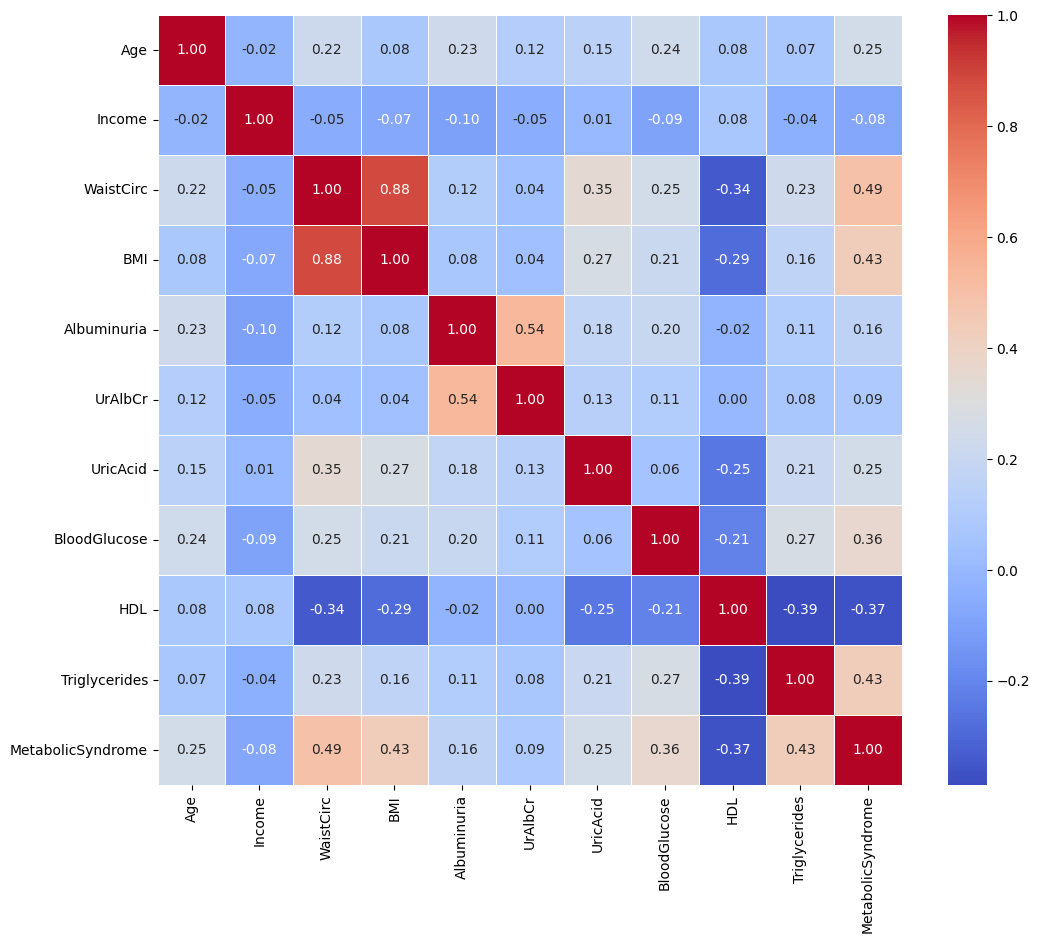

In [ ]:
# Računamo matricu korelacije za sve obeležja
matrica_korelacije = df.corr()

# Prikazivanje heatmap-a matrice korelacije
plt.figure(figsize=(12, 10))
sns.heatmap(matrica_korelacije, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

###odabir diskriminatornog obeležja

NUMERIČKA OBELEŽJA

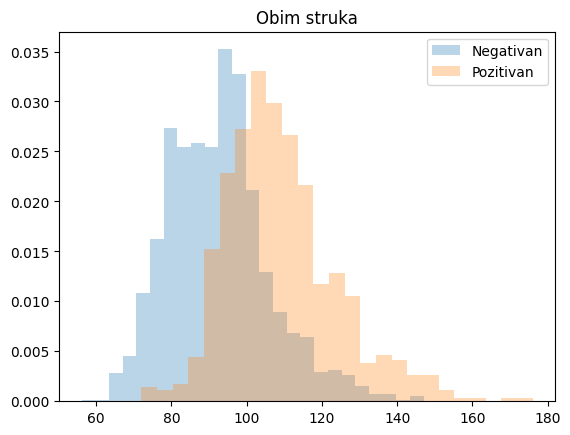

In [ ]:
plt.hist(df.loc[df['MetabolicSyndrome']==0,'WaistCirc'],label='Negativan',density=True,bins=25,alpha=0.3)
plt.hist(df.loc[df['MetabolicSyndrome']==1,'WaistCirc'],density=True,bins=25,alpha=0.3,label='Pozitivan')
plt.title("Obim struka")

plt.legend()

(array([0.00173792, 0.00115861, 0.00753099, 0.02085506, 0.04286873,
        0.0648824 , 0.07357201, 0.07415132, 0.05908933, 0.03186189,
        0.03186189, 0.02317229, 0.01042753, 0.00868961, 0.00521376,
        0.00868961, 0.00289654, 0.00115861, 0.00231723, 0.00231723,
        0.00115861, 0.        , 0.        , 0.        , 0.00057931]),
 array([16.2, 18.3, 20.4, 22.5, 24.6, 26.7, 28.8, 30.9, 33. , 35.1, 37.2,
        39.3, 41.4, 43.5, 45.6, 47.7, 49.8, 51.9, 54. , 56.1, 58.2, 60.3,
        62.4, 64.5, 66.6, 68.7]),
 <BarContainer object of 25 artists>)

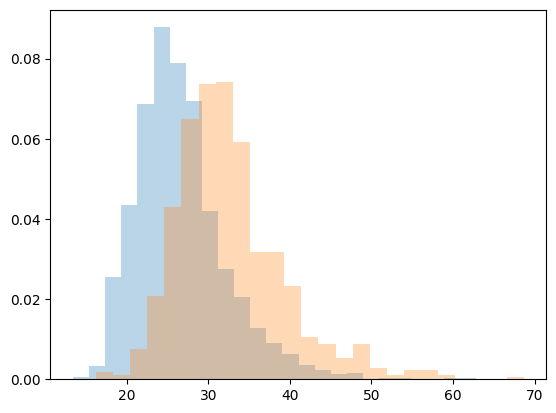

In [ ]:
plt.hist(df.loc[df['MetabolicSyndrome']==0,'BMI'],density=True,bins=25,alpha=0.3)
plt.hist(df.loc[df['MetabolicSyndrome']==1,'BMI'],density=True,bins=25,alpha=0.3)

(array([3.99761315e-03, 8.21075871e-05, 3.59220694e-05, 3.59220694e-05,
        1.02634484e-05, 5.13172420e-06, 5.13172420e-06, 5.13172420e-06,
        5.13172420e-06, 1.02634484e-05, 1.02634484e-05, 0.00000000e+00,
        0.00000000e+00, 5.13172420e-06, 5.13172420e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.13172420e-06]),
 array([1.4100000e+00, 2.3847360e+02, 4.7553720e+02, 7.1260080e+02,
        9.4966440e+02, 1.1867280e+03, 1.4237916e+03, 1.6608552e+03,
        1.8979188e+03, 2.1349824e+03, 2.3720460e+03, 2.6091096e+03,
        2.8461732e+03, 3.0832368e+03, 3.3203004e+03, 3.5573640e+03,
        3.7944276e+03, 4.0314912e+03, 4.2685548e+03, 4.5056184e+03,
        4.7426820e+03, 4.9797456e+03, 5.2168092e+03, 5.4538728e+03,
        5.6909364e+03, 5.9280000e+03]),
 <BarContainer object of 25 artists>)

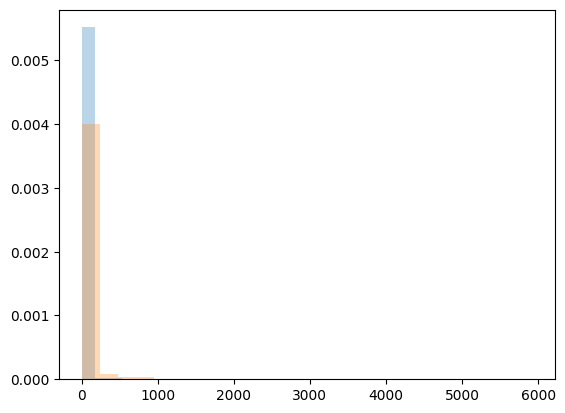

In [ ]:
plt.hist(df.loc[df['MetabolicSyndrome']==0,'UrAlbCr'],density=True,bins=25,alpha=0.3)
plt.hist(df.loc[df['MetabolicSyndrome']==1,'UrAlbCr'],density=True,bins=25,alpha=0.3)

(array([0.00661166, 0.0231408 , 0.04297577, 0.04297577, 0.11239818,
        0.14215064, 0.13884481, 0.24132551, 0.29421877, 0.19834973,
        0.3206654 , 0.28430128, 0.16198561, 0.20496139, 0.11239818,
        0.08264572, 0.09917487, 0.08264572, 0.02644663, 0.0462816 ,
        0.01322332, 0.0231408 , 0.00330583, 0.00330583, 0.00991749]),
 array([ 2.1  ,  2.468,  2.836,  3.204,  3.572,  3.94 ,  4.308,  4.676,
         5.044,  5.412,  5.78 ,  6.148,  6.516,  6.884,  7.252,  7.62 ,
         7.988,  8.356,  8.724,  9.092,  9.46 ,  9.828, 10.196, 10.564,
        10.932, 11.3  ]),
 <BarContainer object of 25 artists>)

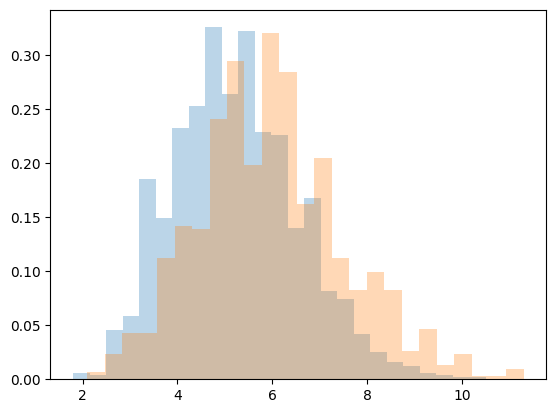

In [ ]:
plt.hist(df.loc[df['MetabolicSyndrome']==0,'UricAcid'],density=True,bins=25,alpha=0.3)
plt.hist(df.loc[df['MetabolicSyndrome']==1,'UricAcid'],density=True,bins=25,alpha=0.3)

(array([9.07869412e-05, 9.07869412e-05, 9.98656353e-04, 1.28009587e-02,
        2.87794604e-02, 1.31641065e-02, 5.53800341e-03, 3.08675600e-03,
        1.90652577e-03, 1.63416494e-03, 6.35508588e-04, 8.17082471e-04,
        3.63147765e-04, 6.35508588e-04, 9.07869412e-04, 6.35508588e-04,
        3.63147765e-04, 5.44721647e-04, 4.53934706e-04, 2.72360824e-04,
        4.53934706e-04, 1.81573882e-04, 9.07869412e-05, 9.07869412e-05,
        9.07869412e-05]),
 array([ 47. ,  60.4,  73.8,  87.2, 100.6, 114. , 127.4, 140.8, 154.2,
        167.6, 181. , 194.4, 207.8, 221.2, 234.6, 248. , 261.4, 274.8,
        288.2, 301.6, 315. , 328.4, 341.8, 355.2, 368.6, 382. ]),
 <BarContainer object of 25 artists>)

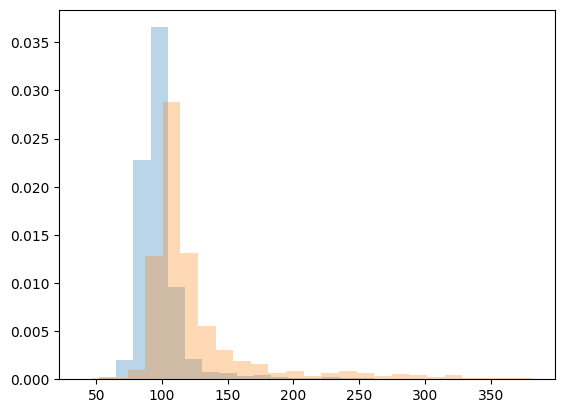

In [ ]:
plt.hist(df.loc[df['MetabolicSyndrome']==0,'BloodGlucose'],density=True,bins=25,alpha=0.3)
plt.hist(df.loc[df['MetabolicSyndrome']==1,'BloodGlucose'],density=True,bins=25,alpha=0.3)

(array([2.86058919e-03, 4.86697466e-03, 4.56899662e-03, 1.70840743e-03,
        1.03299054e-03, 4.37034459e-04, 1.78786824e-04, 2.18517229e-04,
        1.78786824e-04, 1.19191216e-04, 7.94608107e-05, 0.00000000e+00,
        1.98652027e-05, 0.00000000e+00, 0.00000000e+00, 1.98652027e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.98652027e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.98652027e-05]),
 array([  31.  ,   92.24,  153.48,  214.72,  275.96,  337.2 ,  398.44,
         459.68,  520.92,  582.16,  643.4 ,  704.64,  765.88,  827.12,
         888.36,  949.6 , 1010.84, 1072.08, 1133.32, 1194.56, 1255.8 ,
        1317.04, 1378.28, 1439.52, 1500.76, 1562.  ]),
 <BarContainer object of 25 artists>)

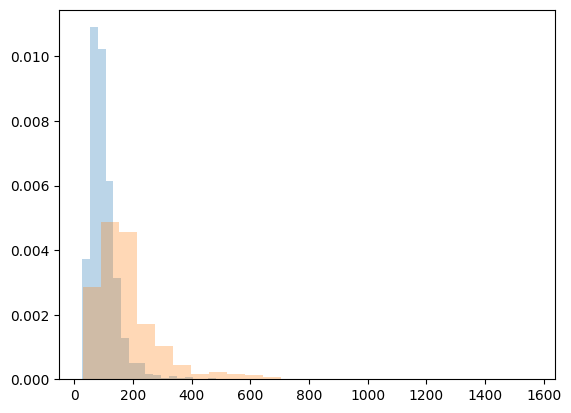

In [ ]:
plt.hist(df.loc[df['MetabolicSyndrome']==0,'Triglycerides'],density=True,bins=25,alpha=0.3)
plt.hist(df.loc[df['MetabolicSyndrome']==1,'Triglycerides'],density=True,bins=25,alpha=0.3)

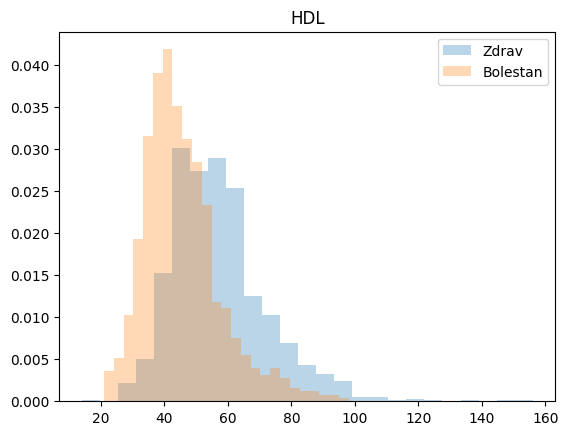

In [ ]:
plt.hist(df.loc[df['MetabolicSyndrome']==0,'HDL'],label='Zdrav',density=True,bins=25,alpha=0.3)
plt.hist(df.loc[df['MetabolicSyndrome']==1,'HDL'],density=True,bins=25,alpha=0.3,label='Bolestan')
plt.title("HDL")

plt.legend()

(array([0.0081103 , 0.00709651, 0.0081103 , 0.00658962, 0.00760341,
        0.01520681, 0.01165856, 0.01926196, 0.01267234, 0.01672749,
        0.02331711, 0.01216545, 0.02331711, 0.01317924, 0.01774128,
        0.02534469, 0.02179643, 0.03041363, 0.01875507, 0.01165856,
        0.03092052, 0.00861719, 0.01926196, 0.01115166, 0.03598946]),
 array([20. , 22.4, 24.8, 27.2, 29.6, 32. , 34.4, 36.8, 39.2, 41.6, 44. ,
        46.4, 48.8, 51.2, 53.6, 56. , 58.4, 60.8, 63.2, 65.6, 68. , 70.4,
        72.8, 75.2, 77.6, 80. ]),
 <BarContainer object of 25 artists>)

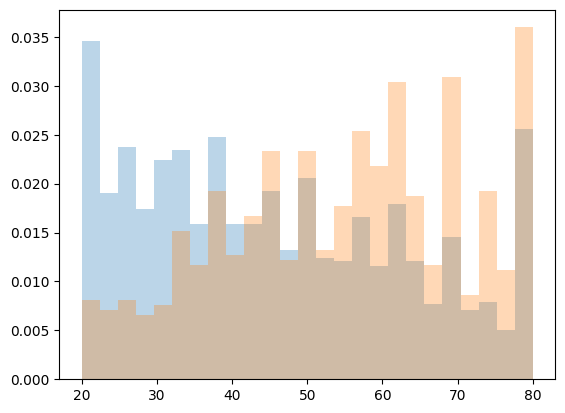

In [ ]:
plt.hist(df.loc[df['MetabolicSyndrome']==0,'Age'],density=True,bins=25,alpha=0.3)
plt.hist(df.loc[df['MetabolicSyndrome']==1,'Age'],density=True,bins=25,alpha=0.3)

(array([0.00011187, 0.00016081, 0.00027967, 0.00031462, 0.0003356 ,
        0.        , 0.00043698, 0.        , 0.        , 0.00027267,
        0.        , 0.        , 0.0001678 , 0.        , 0.00013284,
        0.        , 0.00018877, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.0001713 , 0.        , 0.00030064]),
 array([ 300.,  648.,  996., 1344., 1692., 2040., 2388., 2736., 3084.,
        3432., 3780., 4128., 4476., 4824., 5172., 5520., 5868., 6216.,
        6564., 6912., 7260., 7608., 7956., 8304., 8652., 9000.]),
 <BarContainer object of 25 artists>)

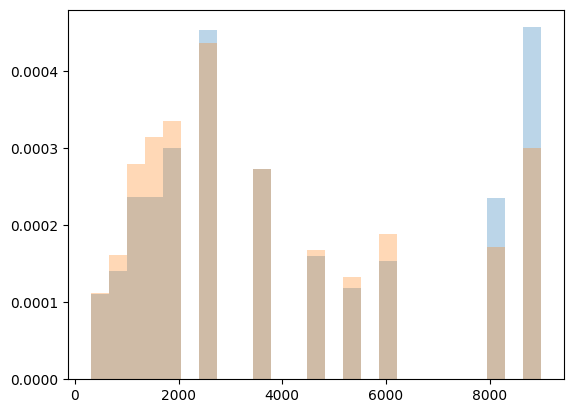

In [ ]:
plt.hist(df.loc[df['MetabolicSyndrome']==0,'Income'],density=True,bins=25,alpha=0.3)
plt.hist(df.loc[df['MetabolicSyndrome']==1,'Income'],density=True,bins=25,alpha=0.3)

KATEGORICKA OBELEZJA


In [ ]:
pd.crosstab(df['MetabolicSyndrome'],df['Sex']).style.background_gradient(cmap='summer_r')

Sex,Female,Male
MetabolicSyndrome,,
0,808,771
1,403,419


<Axes: xlabel='MetabolicSyndrome', ylabel='count'>

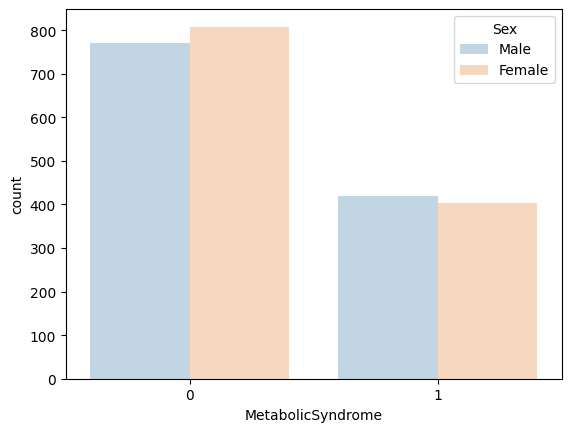

In [ ]:
sns.countplot(x='MetabolicSyndrome',hue='Sex',data=df, alpha=0.3)

In [ ]:
pd.crosstab(df['MetabolicSyndrome'],df['Marital']).style.background_gradient(cmap='summer_r')

Marital,Divorced,Married,Separated,Single,Widowed
MetabolicSyndrome,,,,,
0,145,792,61,482,99
1,97,460,34,157,74


<Axes: xlabel='MetabolicSyndrome', ylabel='count'>

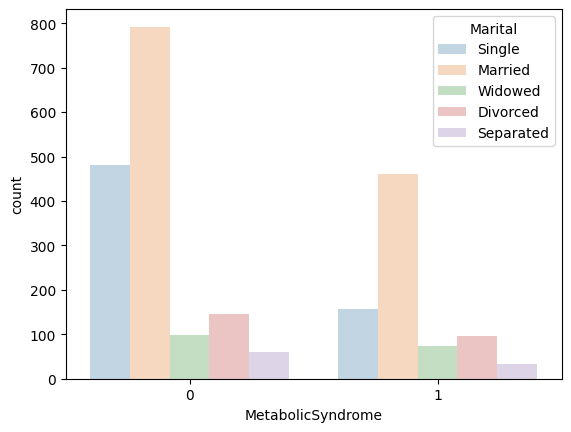

In [ ]:
sns.countplot(x='MetabolicSyndrome',hue='Marital',data=df, alpha=0.3)

In [ ]:
pd.crosstab(df['MetabolicSyndrome'],df['Race']).style.background_gradient(cmap='summer_r')

Race,Asian,Black,Hispanic,MexAmerican,Other,White
MetabolicSyndrome,,,,,,
0,268,367,154,150,44,596
1,81,181,103,103,17,337


<Axes: xlabel='MetabolicSyndrome', ylabel='count'>

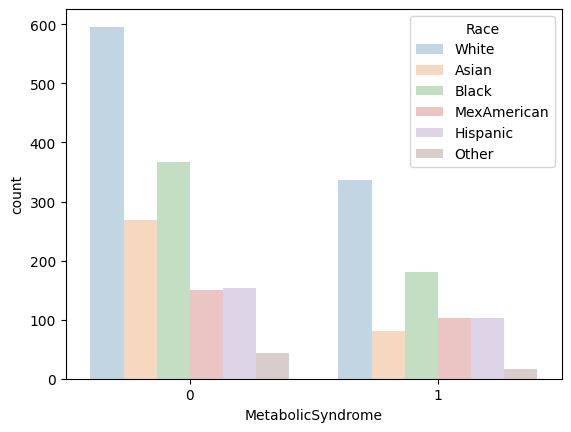

In [ ]:
sns.countplot(x='MetabolicSyndrome',hue='Race',data=df, alpha=0.3)

In [ ]:
pd.crosstab(df['MetabolicSyndrome'],df['Albuminuria']).style.background_gradient(cmap='summer_r')

Albuminuria,0,1,2
MetabolicSyndrome,,,
0,1434,123,22
1,655,131,36


<Axes: xlabel='MetabolicSyndrome', ylabel='count'>

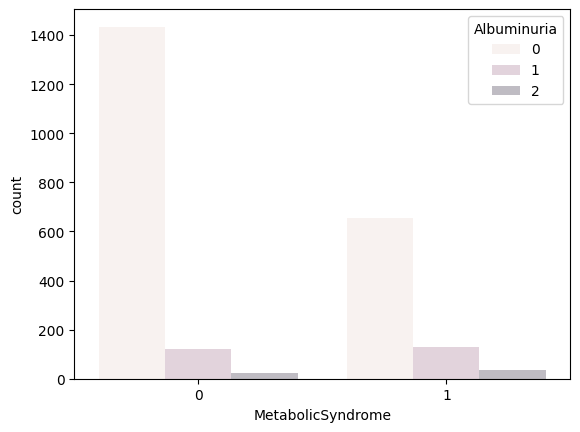

In [ ]:
sns.countplot(x='MetabolicSyndrome',hue='Albuminuria',data=df, alpha=0.3)

#**DRUGI DEO PROJEKTNOG ZADATKA**

In [ ]:
#u y smeštamo klasnu labelu
x = df.drop(columns = ['MetabolicSyndrome'], axis = 1)
y = df['MetabolicSyndrome']

In [ ]:
#pretvaramo kategorička obeležja u dummies
x=pd.get_dummies(x)
x.head()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,...,Marital_Married,Marital_Separated,Marital_Single,Marital_Widowed,Race_Asian,Race_Black,Race_Hispanic,Race_MexAmerican,Race_Other,Race_White
0,22,8200.0,81.0,23.3,0,3.88,4.9,92,41,84,...,0,0,1,0,0,0,0,0,0,1
1,44,4500.0,80.1,23.2,0,8.55,4.5,82,28,56,...,1,0,0,0,0,0,0,0,0,1
2,21,800.0,69.6,20.1,0,5.07,5.4,107,43,78,...,0,0,1,0,1,0,0,0,0,0
3,43,2000.0,120.4,33.3,0,5.22,5.0,104,73,141,...,0,0,1,0,0,1,0,0,0,0
4,51,2500.0,81.1,20.1,0,8.13,5.0,95,43,126,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
#deljenje na numerička i dummy obeležja
numeric_feats = [item for item in x.columns if '_' not in item]
print(numeric_feats)
dummy_feats = [item for item in x.columns if '_' in item]
print(dummy_feats)

['Age', 'Income', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides']
['Sex_Female', 'Sex_Male', 'Marital_Divorced', 'Marital_Married', 'Marital_Separated', 'Marital_Single', 'Marital_Widowed', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_MexAmerican', 'Race_Other', 'Race_White']


## **KNN Algoritam**

###STANDARDIZACIJA


In [ ]:
#delimo na train i test, 10 posto je ostavljeno za testiranje
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 12,stratify=y)

In [ ]:
# standardizacija
s = StandardScaler()
s.fit(x_train[numeric_feats])
x_train_std = s.transform(x_train[numeric_feats])
x_test_std = s.transform(x_test[numeric_feats])
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)

x_train_std = pd.concat([x_train_std, x_train[dummy_feats].reset_index(drop=True)], axis=1)
x_test_std = pd.concat([x_test_std, x_test[dummy_feats].reset_index(drop=True)], axis=1)


x_train_std.columns = list(x.columns)
x_test_std.columns = list(x.columns)
x_train_std.head()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,...,Marital_Married,Marital_Separated,Marital_Single,Marital_Widowed,Race_Asian,Race_Black,Race_Hispanic,Race_MexAmerican,Race_Other,Race_White
0,0.292730,-0.768411,0.585510,0.223692,-0.372901,-0.148330,-0.824978,-0.099584,-0.165807,0.050893,...,1,0,0,0,1,0,0,0,0,0
1,1.648016,0.193813,-0.679198,-0.554270,-0.372901,-0.125611,-0.273098,-0.326663,3.011800,-0.715872,...,0,0,0,1,0,1,0,0,0,0
2,-0.610794,-0.493490,-0.785110,-0.838525,-0.372901,-0.099672,-0.893963,-0.156354,-0.761608,-0.197496,...,1,0,0,0,0,0,0,0,0,1
3,0.857433,-1.077697,0.685192,1.585124,-0.372901,-0.138376,0.002842,0.553269,-0.232007,-0.607877,...,0,0,1,0,0,1,0,0,0,0
4,-1.062556,1.465323,-1.065464,-1.242467,-0.372901,-0.115361,-0.342083,-0.496973,1.489197,-0.823867,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
#provera najboljih parametara
parameters =  {
    'n_neighbors': [ 1,3,5, 6, 7, 8, 9, 11,13,15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}
classifier = KNeighborsClassifier()
clf_knn = GridSearchCV(classifier, parameters, scoring='recall', cv=10)
clf_knn.fit(x_train_std, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 6, 7, 8, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [ ]:
print("Best score: ", clf_knn.best_score_)
print("Best hyperparameters: ", clf_knn.best_params_)

Best score:  0.6536097741577193
Best hyperparameters:  {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}


In [ ]:
# obuka na trening skupu
classifier_knn_std = KNeighborsClassifier(metric = 'euclidean', n_neighbors =  6, weights = 'distance')
classifier_knn_std.fit(x_train_std,y_train)

# testiranje na test skupu
y_pred = classifier_knn_std.predict(x_test_std)

In [ ]:
#evaluacija klasifikatora, posmatramo senzitivnost

precision = metrics.precision_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred)
f_score = metrics.f1_score(y_test, y_pred)

print('precision: ', precision)
print('accuracy: ', accuracy)
print('sensitivity/recall: ', sensitivity)
print('F score: ', f_score)

precision:  0.7397260273972602
accuracy:  0.8008298755186722
sensitivity/recall:  0.6506024096385542
F score:  0.6923076923076923


In [ ]:
#matrica konfuzije
conf_mat_knn_std = confusion_matrix(y_test, y_pred, labels=classifier_knn_std.classes_) # TN, FP
print(conf_mat_knn_std)

[[139  19]
 [ 29  54]]


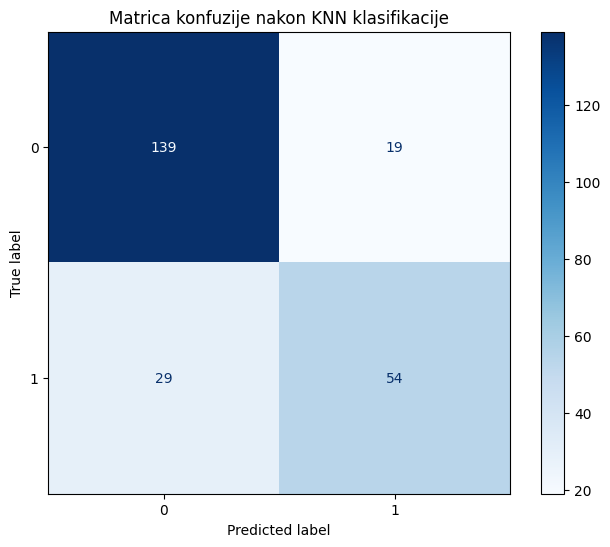

In [ ]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_knn_std)

plt.figure(figsize=(8, 6))
plt.title('Matrica konfuzije nakon KNN klasifikacije')

disp.plot(cmap="Blues", ax=plt.gca())
plt.show()

## **Decision Tree Algoritam**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 12,stratify=y)

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6,7,8,9,10],
    'max_features': ['sqrt', 'log2', None],

}


clf_decision_tree_std = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='recall', cv=10)
clf_decision_tree_std.fit(x_train_std, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='recall')

In [ ]:
print("najbolji skor: ", clf_decision_tree_std.best_score_)
print("najbolji hiperparametri: ", clf_decision_tree_std.best_params_)

najbolji skor:  0.8714550166604962
najbolji hiperparametri:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': None}


In [ ]:
class_decision_tree_std = DecisionTreeClassifier(criterion= 'entropy', max_depth = 5,max_features = None)
class_decision_tree_std.fit(x_train_std,y_train)
y_pred = class_decision_tree_std.predict(x_test_std)

In [ ]:
precision = metrics.precision_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred)
f_score = metrics.f1_score(y_test, y_pred)

print('precision: ', precision)
print('accuracy: ', accuracy)
print('sensitivity/recall: ', sensitivity)
print('F score: ', f_score)

precision:  0.8444444444444444
accuracy:  0.9128630705394191
sensitivity/recall:  0.9156626506024096
F score:  0.8786127167630058


In [ ]:
conf_mat_decision_tree_std = confusion_matrix(y_test, y_pred, labels=class_decision_tree_std.classes_) # TN, FP
print(conf_mat_decision_tree_std)

[[144  14]
 [  7  76]]


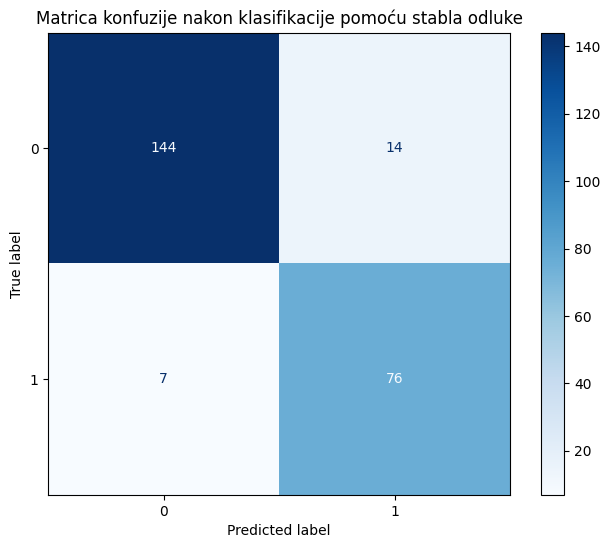

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_decision_tree_std,  display_labels=class_decision_tree_std.classes_)

plt.figure(figsize=(8, 6))
plt.title('Matrica konfuzije nakon klasifikacije pomoću stabla odluke')

disp.plot(cmap="Blues", ax=plt.gca())
plt.show()

## **Support Vector Machine Algoritam**

In [ ]:
param_grid = {
    'kernel': ['rbf'],
    'C': [0.2, 0.5, 2, 5, 10],
    'gamma' : ['scale', 'auto']
}
classifier_svm = SVC()
clf_svm = GridSearchCV(classifier_svm, param_grid, scoring='recall', cv=10)
clf_svm.fit(x_train_std, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.2, 0.5, 2, 5, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf']},
             scoring='recall')

In [ ]:
print("najbolji skor: ", clf_svm.best_score_)
print("najbolji hiperparametri: ", clf_svm.best_params_)

najbolji skor:  0.7578489448352462
najbolji hiperparametri:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
param_grid = {
    'kernel': ['linear', 'poly'],
    'C': [0.2, 0.5, 2, 5, 10],

}
classifier_svm = SVC()
clf_svm = GridSearchCV(classifier_svm, param_grid, scoring='recall', cv=10)
clf_svm.fit(x_train_std, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.2, 0.5, 2, 5, 10],
                         'kernel': ['linear', 'poly']},
             scoring='recall')

In [ ]:
print("najbolji skor: ", clf_svm.best_score_)
print("najbolji hiperparametri: ", clf_svm.best_params_)

najbolji skor:  0.7010366530914476
najbolji hiperparametri:  {'C': 0.5, 'kernel': 'linear'}


In [ ]:
#OVO JE KADA KORISTIMO LINEAR  I POLY BEZ GAMMA
#najbolji skor:  0.7010366530914476
#najbolji hiperparametri:  {'C': 0.5, 'kernel': 'linear'}

In [ ]:
classifier_svm_std = SVC(kernel= 'rbf', C = 10, gamma = 'scale')
classifier_svm_std.fit(x_train_std,y_train)
y_pred = classifier_svm_std.predict(x_test_std)

In [ ]:
precision = metrics.precision_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred)
f_score = metrics.f1_score(y_test, y_pred)

print('precision: ', precision)
print('accuracy: ', accuracy)
print('sensitivity/recall: ', sensitivity)
print('F score: ', f_score)

precision:  0.8117647058823529
accuracy:  0.8755186721991701
sensitivity/recall:  0.8313253012048193
F score:  0.8214285714285715


In [ ]:
conf_mat_svm_std = confusion_matrix(y_test, y_pred, labels=classifier_svm_std.classes_) # TN, FP
print(conf_mat_svm_std)

[[142  16]
 [ 14  69]]


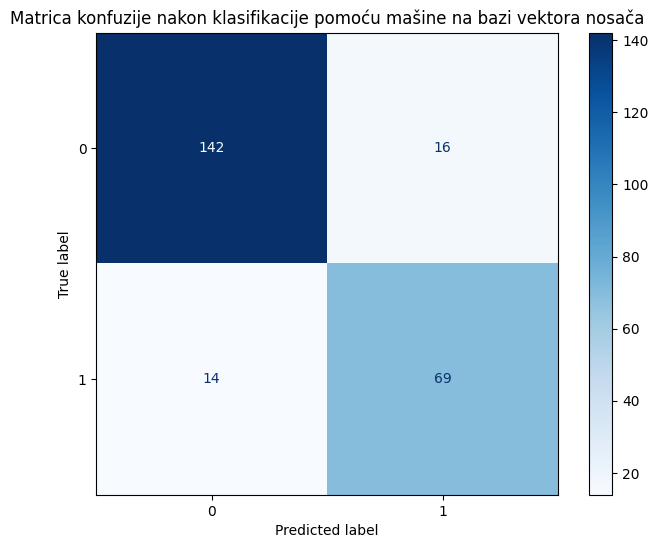

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_svm_std,  display_labels=classifier_svm_std.classes_)

plt.figure(figsize=(8, 6))
plt.title('Matrica konfuzije nakon klasifikacije pomoću mašine na bazi vektora nosača')

disp.plot(cmap="Blues", ax=plt.gca())
plt.show()

# **PCA**



In [ ]:
pca = PCA(n_components=0.92)
pca.fit(x_train_std)
x_train_pca = pca.transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

In [ ]:
optimalan_broj_komponenti = pca.n_components_
print("Optimalan broj komponenti za PCA:", optimalan_broj_komponenti)

Optimalan broj komponenti za PCA: 12


Text(0, 0.5, 'Udeo objašnjene varijanse')

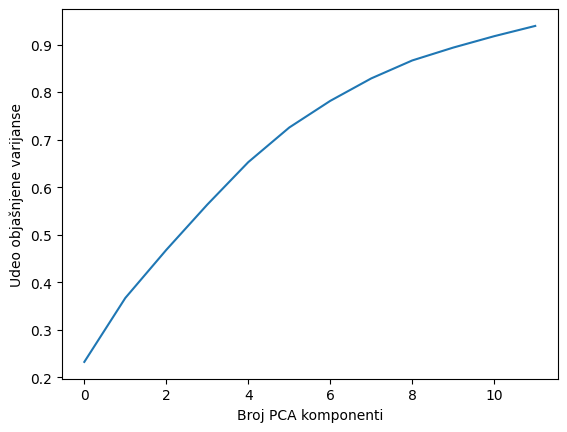

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Broj PCA komponenti')

plt.ylabel('Udeo objašnjene varijanse')

## KNN Algoritam sa pca

In [ ]:
parameters =  {
    'n_neighbors': [ 1,2,3,4,5, 6, 7, 8, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}
classifier = KNeighborsClassifier()
clf_knn_pca = GridSearchCV(classifier, parameters, scoring='recall', cv=10)
clf_knn_pca.fit(x_train_pca, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [ ]:
print("Best score: ", clf_knn_pca.best_score_)
print("Best hyperparameters: ", clf_knn_pca.best_params_)

Best score:  0.6833950388744909
Best hyperparameters:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
classifier_knn_pca = KNeighborsClassifier(metric = 'euclidean', n_neighbors =  3, weights = 'distance')
classifier_knn_pca.fit(x_train_pca,y_train)

# testiranje na test skupu
y_pred = classifier_knn_pca.predict(x_test_pca)

from sklearn import metrics
precision = metrics.precision_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred)
f_score = metrics.f1_score(y_test, y_pred)

print('precision: ', precision)
print('accuracy: ', accuracy)
print('sensitivity/recall: ', sensitivity)
print('F score: ', f_score)

precision:  0.7228915662650602
accuracy:  0.8091286307053942
sensitivity/recall:  0.7228915662650602
F score:  0.7228915662650603


[[135  23]
 [ 23  60]]


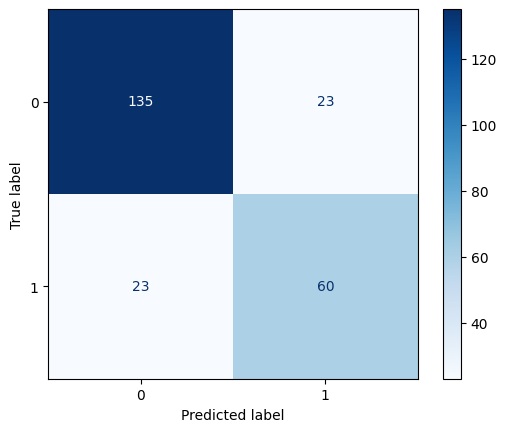

In [ ]:
conf_mat_knn_std = confusion_matrix(y_test, y_pred, labels=classifier_knn_std.classes_) # TN, FP
print(conf_mat_knn_std)

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_knn_std,  display_labels=classifier_knn_std.classes_)
disp.plot(cmap="Blues")

In [ ]:
#PROVERA SENZITIVNOSTI NA OSNOVU PROMENE PARAMETARA n_components
#0.92 - sensitivity/recall:  0.7228915662650602
#0.95 - sensitivity/recall:  0.6506024096385542
#0.97 - sensitivity/recall:  0.6867469879518072

##Decision Tree Algoritam sa pca

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6,7,8,9,10],
    'max_features': ['sqrt', 'log2', None],

}
clf_decision_tree_pca = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='recall', cv=10)
clf_decision_tree_pca.fit(x_train_pca, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='recall')

In [ ]:
print("najbolji skor: ", clf_decision_tree_pca.best_score_)
print("najbolji hiperparametri: ", clf_decision_tree_pca.best_params_)

najbolji skor:  0.709033691225472
najbolji hiperparametri:  {'criterion': 'gini', 'max_depth': 4, 'max_features': None}


In [ ]:
class_decision_tree_pca = DecisionTreeClassifier(criterion= 'gini', max_depth = 4, max_features = None)
class_decision_tree_pca.fit(x_train_pca,y_train)
y_pred = class_decision_tree_pca.predict(x_test_pca)

In [ ]:
from sklearn import metrics
precision = metrics.precision_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred)
f_score = metrics.f1_score(y_test, y_pred)

print('precision: ', precision)
print('accuracy: ', accuracy)
print('sensitivity/recall: ', sensitivity)
print('F score: ', f_score)

precision:  0.735632183908046
accuracy:  0.8257261410788381
sensitivity/recall:  0.7710843373493976
F score:  0.7529411764705882


In [ ]:
conf_mat_decision_tree_pca = confusion_matrix(y_test, y_pred, labels=class_decision_tree_pca.classes_) # TN, FP
print(conf_mat_decision_tree_pca)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_decision_tree_pca,  display_labels=class_decision_tree_pca.classes_)
disp.plot(cmap="Blues")

[[135  23]
 [ 19  64]]


Error in callback <function flush_figures at 0x7fe8cea44280> (for post_execute):


KeyboardInterrupt: 

In [ ]:
#PROVERA SENZITIVNOSTI NA OSNOVU PROMENE PARAMETARA n_components
#0.92 - sensitivity/recall:  0.7710843373493976
#0.95 - sensitivity/recall:  0.7469879518072289
#0.97 - sensitivity/recall:  0.6867469879518072

## Support Vector Machine sa pca


In [ ]:
param_grid = {
    'kernel': ['rbf'],
    'C': [0.2, 0.5, 2, 5, 10],
    'gamma' : ['scale', 'auto']
}
classifier_svm = SVC()
clf_svm_pca = GridSearchCV(classifier_svm, param_grid, scoring='recall', cv=10)
clf_svm_pca.fit(x_train_pca, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.2, 0.5, 2, 5, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf']},
             scoring='recall')

In [ ]:
print("najbolji skor: ", clf_svm_pca.best_score_)
print("najbolji hiperparametri: ", clf_svm_pca.best_params_)

najbolji skor:  0.7537763791188449
najbolji hiperparametri:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
# ZA LINEAR I POLY BEZ GAMMA JE
#najbolji skor:  0.695612736023695
#najbolji hiperparametri:  {'C': 2, 'kernel': 'linear'}

In [ ]:
classifier_svm_pca = SVC(kernel= 'rbf', C = 10, gamma = 'auto')
classifier_svm_pca.fit(x_train_pca,y_train)
y_pred = classifier_svm_pca.predict(x_test_pca)

precision:  0.8589743589743589
accuracy:  0.8879668049792531
sensitivity/recall:  0.8072289156626506
F score:  0.8322981366459627
[[147  11]
 [ 16  67]]


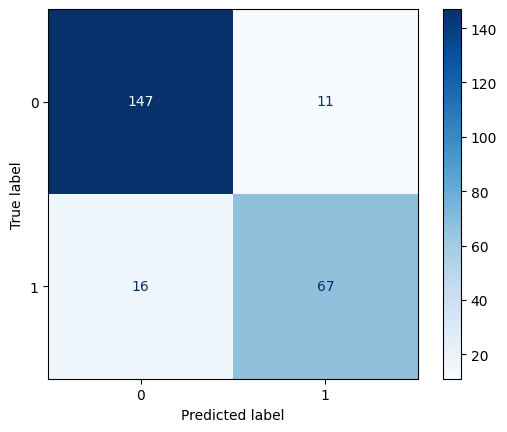

In [ ]:
from sklearn import metrics
precision = metrics.precision_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred)
f_score = metrics.f1_score(y_test, y_pred)

print('precision: ', precision)
print('accuracy: ', accuracy)
print('sensitivity/recall: ', sensitivity)
print('F score: ', f_score)

conf_mat_svm_pca = confusion_matrix(y_test, y_pred, labels=classifier_svm_pca.classes_) # TN, FP
print(conf_mat_svm_pca)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_svm_pca,  display_labels=classifier_svm_pca.classes_)
disp.plot(cmap="Blues")

In [ ]:
#PROVERA SENZITIVNOSTI NA OSNOVU PROMENE PARAMETARA n_components
#0.92 - sensitivity/recall:  0.8072289156626506
#0.95 - sensitivity/recall:  0.7831325301204819
#0.97 - sensitivity/recall:  0.7831325301204819